# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [59]:
# Initial imports
import os
from pathlib import Path
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\eliza\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [60]:
# Read your api key environment variable

load_dotenv("example.env")
api_key = os.getenv("NEWS_API_KEY")




In [61]:
# Create a newsapi client

newsapi = NewsApiClient(api_key=api_key)

In [62]:
# Fetch the Bitcoin news articles

# #bitcoin_news = newsapi.get_everything(q='bitcoin',
#                                       language='en',
#                                       sort_by='publishedAt',
#                                       page=2) 

# #print (bitcoin_news["totalResults"])


In [ ]:
#print the # of results
print(f"The total number of results is:{bitcoin_news['totalResults']}")

In [63]:
#Save the results as a json file

import json 

#convert the results to a string using json dumps()
#result = json.dumps(bitcoin_news, indent=6)

#Save "result" to a json file

# file2write=open("bitcoin_news.json",'w')
# file2write.write(result)
# file2write.close()

#print(result)

In [65]:
#Open json file
import json 
# Opening JSON file 
f = open('bitcoin_news.json',) 
  
# returns JSON object as  
# a dictionary 
bitcoin_data = json.load(f) 
  
# Iterating through the json 
# list 
for i in bitcoin_data: 
    #print(i) 
  
# Closing file 
    f.close() 

#print (bitcoin_data)

In [14]:
# # Fetch the Ethereum news articles

# ethereum_news =  newsapi.get_everything(q='ethereum',
#                                       language='en',
#                                       sort_by='publishedAt',
#                                       page=2) 

In [72]:
# #Save the results as a json file


# #convert the results to a string using json dumps()
# result2 = json.dumps(ethereum_news, indent=6)

# #Save "result" to a json file

# file2write=open("ethereum_news.json",'w')
# file2write.write(result2)

# file2write.close()

# #print(result2)

In [73]:
# Opening JSON file 

f = open('ethereum_news.json',) 
  
# returns JSON object as  
# a dictionary 
ethereum_data = json.load(f) 
  
# Iterating through the json 
# list 
for i in ethereum_data: 
    #print(i) 
  
# Closing file 
    f.close() 

#print (ethereum_data)

In [74]:
# Create the Bitcoin sentiment scores DataFrame

bitcoin_sentiments = []

for article in bitcoin_data ["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        bitcoin_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
bitcoin_df = pd.DataFrame(bitcoin_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
bitcoin_df =bitcoin_df[cols]

bitcoin_df.tail()


,date,text,compound,positive,negative,neutral
15,2020-09-02,Following an earlier endeavor selling Bitcoin ...,0.3612,0.070,0.000,0.930
16,2020-09-02,Note: All information on this page is subject ...,0.8402,0.250,0.000,0.750
17,2020-09-02,Bitcoin Core developer Pieter Wuille has migra...,0.0000,0.000,0.000,1.000
18,2020-09-02,"Click to download audio version\r\n""As we conc...",0.0000,0.000,0.000,1.000
19,2020-09-02,Band Protocol was an early winner in the DeFi ...,0.6808,0.164,0.042,0.794


In [75]:
#Save dataframe as csv file
file_path = Path("Data\bitcoin.csv")
bitcoin_df.to_csv( "bitcoin.csv", index = False)

In [76]:
#Read data from CSV file
file_path = Path("bitcoin.csv")
bitcoin_df= pd.read_csv(file_path)
bitcoin_df.tail()

,date,text,compound,positive,negative,neutral
15,2020-09-02,Following an earlier endeavor selling Bitcoin ...,0.3612,0.070,0.000,0.930
16,2020-09-02,Note: All information on this page is subject ...,0.8402,0.250,0.000,0.750
17,2020-09-02,Bitcoin Core developer Pieter Wuille has migra...,0.0000,0.000,0.000,1.000
18,2020-09-02,"Click to download audio version\r\n""As we conc...",0.0000,0.000,0.000,1.000
19,2020-09-02,Band Protocol was an early winner in the DeFi ...,0.6808,0.164,0.042,0.794


In [77]:
# Create the Ethereum sentiment scores DataFrame

ethereum_sentiments = []

for article in ethereum_data ["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        ethereum_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
ethereum_df = pd.DataFrame(ethereum_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
ethereum_df =ethereum_df[cols]

ethereum_df.head()

,date,text,compound,positive,negative,neutral
0,2020-09-02,William Mougayar is the author of The Business...,0.0000,0.000,0.000,1.000
1,2020-09-02,Note: All information on this page is subject ...,0.8402,0.250,0.000,0.750
2,2020-09-02,Cybersecurity experts at ESET published an in-...,-0.5423,0.000,0.143,0.857
3,2020-09-02,Bitcoin had a lackluster August while Ethereum...,0.1779,0.054,0.000,0.946
4,2020-09-02,Ethan Voraotsady\r\nEthan Voraotsady\r\nEthan ...,0.9062,0.261,0.000,0.739


In [78]:
# Describe the Bitcoin Sentiment

bitcoin_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.00000,20.00000
mean,0.172170,0.090600,0.05085,0.85850
std,0.423102,0.085651,0.06070,0.10399
min,-0.599400,0.000000,0.00000,0.66500
25%,-0.032000,0.000000,0.00000,0.78225
50%,0.140550,0.077000,0.02100,0.86500
75%,0.541550,0.151000,0.08750,0.92550
max,0.840200,0.250000,0.18400,1.00000


In [79]:
# Describe the Ethereum Sentiment

ethereum_df.describe()

,compound,positive,negative,neutral
count,20.000000,20.00000,20.00000,20.000000
mean,0.131755,0.07490,0.04120,0.883950
std,0.499022,0.08597,0.06693,0.083048
min,-0.757900,0.00000,0.00000,0.739000
25%,-0.307000,0.00000,0.00000,0.838000
50%,0.088950,0.04900,0.00000,0.874500
75%,0.476775,0.11400,0.06525,0.940000
max,0.906200,0.26100,0.22400,1.000000


In [80]:
#Save dataframe as csv

### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [82]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [83]:
# Instantiate the lemmatizer
lemmatizer = WordNetLemmatizer()

In [84]:
# Expand the default stopwords list if necessary
# YOUR CODE HERE!
sw = set(stopwords.words('english'))

#print(sw)

sw_addons = {'said', 'saw','sent', 'found', 'including', 'today', 'announced', 'week', 'basically', 'also','get','way', 'url'}

In [87]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    
     # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    re_clean = regex.sub('', text)
    
    # Create a list of the words
    words = word_tokenize(re_clean) 
        
    # Convert the words to lowercase
    output =  [word.lower() for word in words]
   
    
    # Remove the stop words
    new_output =  [word for word in output if word not in sw.union(sw_addons)]
    
    # Lemmatize Words into root words
    tokens = [lemmatizer.lemmatize(word) for word in new_output]
    
    return tokens

In [90]:
#tokenize the text column from the bitcoin dataframe
bitcoin_df["text"].apply(tokenizer)



# Create a new tokens column for Bitcoin
bitcoin_df["tokens"]= bitcoin_df["text"].apply(tokenizer)
bitcoin_df.tail()


,date,text,compound,positive,negative,neutral,tokens
15,2020-09-02,Following an earlier endeavor selling Bitcoin ...,0.3612,0.070,0.000,0.930,"[followingan, earlier, endeavorselling, bitcoi..."
16,2020-09-02,Note: All information on this page is subject ...,0.8402,0.250,0.000,0.750,"[note, information, page, subject, change, use..."
17,2020-09-02,Bitcoin Core developer Pieter Wuille has migra...,0.0000,0.000,0.000,1.000,"[bitcoin, core, developer, pieter, wuille, mig..."
18,2020-09-02,"Click to download audio version\r\n""As we conc...",0.0000,0.000,0.000,1.000,"[click, download, audio, versionas, conclude, ..."
19,2020-09-02,Band Protocol was an early winner in the DeFi ...,0.6808,0.164,0.042,0.794,"[band, protocol, early, winner, defi, craze, p..."


In [92]:
#tokenize the text column from the bitcoin dataframe
ethereum_df["text"].apply(tokenizer)

# Create a new tokens column for Ethereum
ethereum_df["tokens"]= ethereum_df["text"].apply(tokenizer)
ethereum_df.head()


,date,text,compound,positive,negative,neutral,tokens
0,2020-09-02,William Mougayar is the author of The Business...,0.0000,0.000,0.000,1.000,"[william, mougayar, author, business, blockcha..."
1,2020-09-02,Note: All information on this page is subject ...,0.8402,0.250,0.000,0.750,"[note, information, page, subject, change, use..."
2,2020-09-02,Cybersecurity experts at ESET published an in-...,-0.5423,0.000,0.143,0.857,"[cybersecurity, expert, eset, published, indep..."
3,2020-09-02,Bitcoin had a lackluster August while Ethereum...,0.1779,0.054,0.000,0.946,"[bitcoin, lackluster, august, ethereum, gas, f..."
4,2020-09-02,Ethan Voraotsady\r\nEthan Voraotsady\r\nEthan ...,0.9062,0.261,0.000,0.739,"[ethan, voraotsadyethan, voraotsadyethan, vora..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [93]:
from collections import Counter
from nltk import ngrams

In [94]:
#Join all texts to form a big string
bitcoin_big_string = bitcoin_df["text"].str.cat()

#apply tokenizer function to get words
bitcoin_words = tokenizer(bitcoin_big_string)


# Generate the Bitcoin N-grams where N=2
bitcoin_bigram_counts = Counter(ngrams(bitcoin_words, n=2))
print(dict(bitcoin_bigram_counts))

{('authored', 'thorstein'): 1, ('thorstein', 'polleit'): 1, ('polleit', 'via'): 1, ('via', 'mi'): 1, ('mi', 'institutethe'): 1, ('institutethe', 'title'): 1, ('title', 'article'): 1, ('article', 'epitomizes'): 1, ('epitomizes', 'austrian'): 1, ('austrian', 'economist'): 1, ('economist', 'ludwig'): 1, ('ludwig', 'von'): 1, ('von', 'mi'): 1, ('mi', 'called'): 1, ('called', 'sound'): 1, ('sound', 'money'): 1, ('money', 'principleas'): 1, ('principleas', 'mi'): 1, ('mi', 'put'): 1, ('put', 'charsbuying'): 1, ('charsbuying', 'dirtcheap'): 1, ('dirtcheap', 'stock'): 1, ('stock', 'market'): 1, ('market', 'crash'): 1, ('crash', 'could'): 1, ('could', 'sound'): 1, ('sound', 'mean'): 1, ('mean', 'generating'): 1, ('generating', 'high'): 1, ('high', 'return'): 1, ('return', 'long'): 1, ('long', 'run'): 1, ('run', 'undervalued'): 1, ('undervalued', 'share'): 1, ('share', 'historically'): 1, ('historically', 'offered'): 1, ('offered', 'strong'): 1, ('strong', 'capital'): 1, ('capital', 'gain'): 1, 

In [96]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

#Join all texts to form a big string
ethereum_big_string = ethereum_df["text"].str.cat()

#apply tokenizer function to get words
ethereum_words = tokenizer(ethereum_big_string)


# Generate the Ethereum N-grams where N=2
ethereum_bigram_counts = Counter(ngrams(ethereum_words, n=2))
print(dict(ethereum_bigram_counts))

{('william', 'mougayar'): 1, ('mougayar', 'author'): 1, ('author', 'business'): 1, ('business', 'blockchain'): 1, ('blockchain', 'producer'): 1, ('producer', 'token'): 1, ('token', 'summit'): 1, ('summit', 'venture'): 1, ('venture', 'investor'): 1, ('investor', 'adviserdefi'): 1, ('adviserdefi', 'grown'): 1, ('grown', 'point'): 1, ('point', 'mindshare'): 1, ('mindshare', 'far'): 1, ('far', 'exceeds'): 1, ('exceeds', 'relative'): 1, ('relative', 'charsnote'): 1, ('charsnote', 'information'): 1, ('information', 'page'): 1, ('page', 'subject'): 1, ('subject', 'change'): 1, ('change', 'use'): 1, ('use', 'website'): 1, ('website', 'constitutes'): 1, ('constitutes', 'acceptance'): 1, ('acceptance', 'user'): 1, ('user', 'agreement'): 1, ('agreement', 'please'): 1, ('please', 'read'): 1, ('read', 'privacy'): 1, ('privacy', 'policy'): 1, ('policy', 'legal'): 1, ('legal', 'disclaimertrading'): 1, ('disclaimertrading', 'foreign'): 1, ('foreign', 'ex'): 1, ('ex', 'charscybersecurity'): 1, ('charsc

In [98]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [99]:
# Get the top 10 words for Bitcoin

tokens = bitcoin_words 

top10_bitcoin_words =token_count(tokens, N=10)
print(dict(top10_bitcoin_words))

{'bitcoin': 5, 'website': 4, 'attack': 4, 'mi': 3, 'past': 3, 'use': 3, 'user': 3, 'million': 3, 'company': 3, 'ceo': 3}


In [100]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!

tokens = ethereum_words 

top10_ethereum__words =token_count(tokens, N=10)
print(dict(top10_ethereum__words))

{'ethereum': 5, 'market': 5, 'user': 4, 'new': 4, 'token': 3, 'malware': 3, 'august': 3, 'network': 3, 'trading': 3, 'cryptocurrency': 3}


---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [106]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

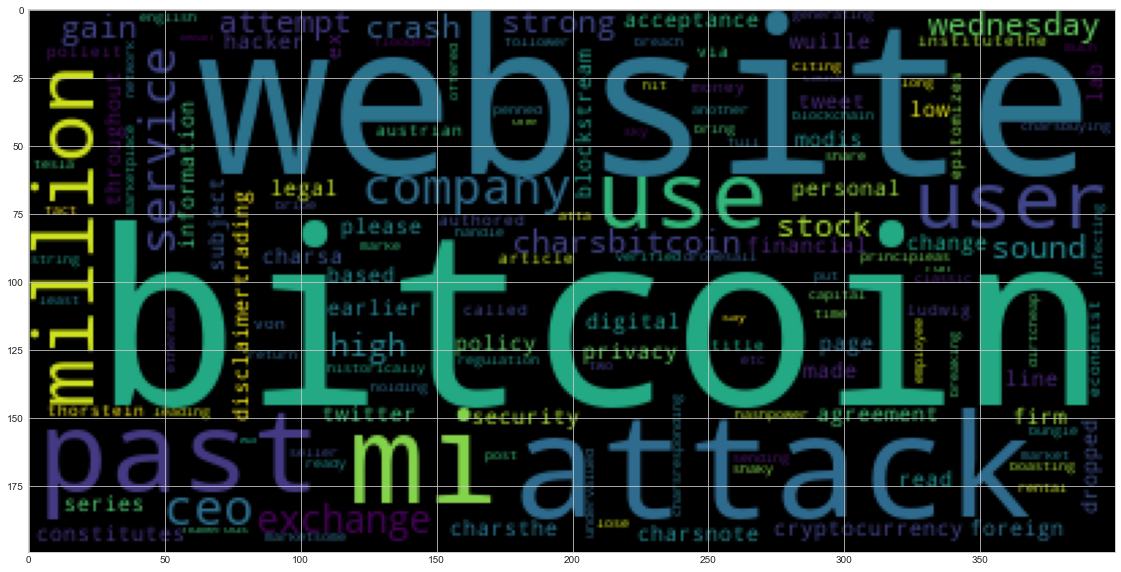

In [110]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

bitcoin_input_text=  ' '.join(bitcoin_words)
#print(bitcoin_input_text)

bitcoin_wc = WordCloud().generate(bitcoin_input_text)
plt.imshow(bitcoin_wc)

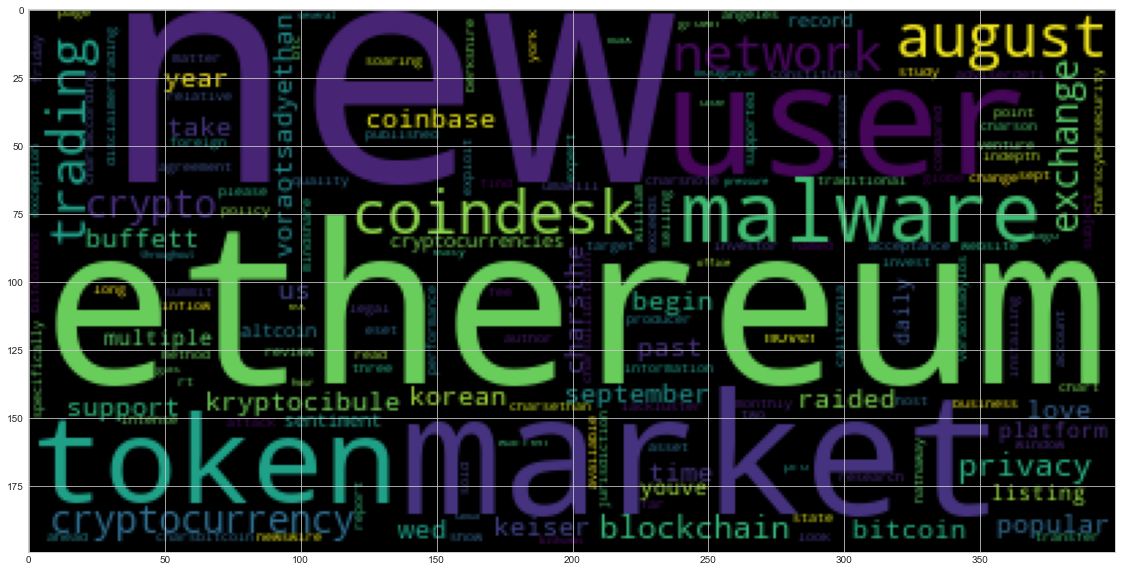

In [111]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

ethereum_input_text=  ' '.join(ethereum_words)
#print(bitcoin_input_text)

ethereum_wc = WordCloud().generate(ethereum_input_text)
plt.imshow(ethereum_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy

In [25]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm

In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [27]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

In [28]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [29]:
# Render the visualization
# YOUR CODE HERE!

In [30]:
# List all Entities
# YOUR CODE HERE!

---

### Ethereum NER

In [31]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!

In [32]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

# Add a title to the document
# YOUR CODE HERE!

In [33]:
# Render the visualization
# YOUR CODE HERE!

In [34]:
# List all Entities
# YOUR CODE HERE!

---